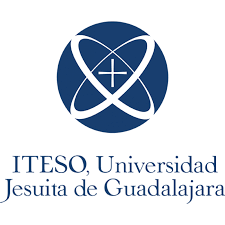

<center><font color=#555555><font size=6> Proyecto de aplicación III <br>

<hr style="border:0.02in solid gray"> </hr>

<center><font color=#555555><font size=6> Preparación y feature engineering de variables numéricas </font> <br> <br>
    
<center><font color=#555555><font size=5> Laboratorio de Procesamiento de Datos </font> <br> <br>
<center><font color=#555555><font size=5> Profesor: Raúl Romero Barragán </font> <br> <br>
<center><font color=#555555><font size=4> Navarro Silva José Tonatiuh, if722399 </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> 10.2022 </a> | <font color= #555555> <font size = 4> Repositorio: <a href='https://github.com/if722399/Proyecto-3-LPD.git'>Aquí</a></font>

<hr style="border:0.02in solid gray"> </hr>

<hr style="border:0.02in solid gray"> </hr>

<font color= #555555> <font size = 5> Objetivo: </font>

<font color= #6B6B6B> <font size = 3>  Tomar la base de datos de Canvas con el nombre db_pap3.csv, analizarla, preprocesarla, y
generar variables con ella.
 </font>

<font color= #555555> <font size = 5> Marco Teórico: </font>

<font color= #6B6B6B> <font size = 3>  En este proyecto lo que se busca es aplicar estadística descriptiva y análisis cruzado entre nuestras variables con el fin de entender la información con la que estamos tratando así como la importancia que tienen nuestras variables para realizar una predicción, una vez entendiendo nuestra información modificaremos apropiadamente las variables que lo requieran (aquellas con información faltante y/o información no coherente), generaremos nuevas con la intención de agregar valor a la explicación de la varianza de nuestra variable objetivo y se realizarán distintos métodos de selección de variables. 
 </font>

<br>

# <font color= #6B6B6B> <font size = 6>Desarrollo </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= brown> <font size = 5> 1. Análisis de nuestro dataset </font>

Importar nuestras librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

# Librería creada para almacenar funciones generales que se utilizarán a lo largo del proyecto
import functions as fn

# Librería creada para almacenar apoyos visuales
import visualizations as vz

In [2]:
# Cargar nuestros datos
df = pd.read_csv('files/db_pap3.csv').copy()

# Echar un vistazo los primeros y a los últimos renglones de nuestro dataset
display(df.head())
display(df.tail())

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28


,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,3,2,3,4003.0,1851,15476,117
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,4,2,3,4277.0,2186,8764,69
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,5,3,4,5409.0,0,10291,60
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,4,3,3,5281.0,0,8395,62
10126,714337233,0,43,F,2,Graduate,Married,1666.6666666666667,Silver,25,6,2,4,10388.0,1961,10294,61


In [3]:
print(f'Este dataset contiene {df.shape[1]} columnas y {len(df)} filas.')

Este dataset contiene 17 columnas y 10127 filas.


Observar un breve reporte de calidad de datos (si existen datos nulos, la granularidad de las variables y el tipo de datos que tenemos)

In [4]:
fn.dqr(df)

,% of nulls,unique_values,type
clientnum,0.0,10127,int64
client_stayed,0.0,2,int64
customer_age,0.0,45,int64
gender,0.0,2,object
dependent_count,0.0,6,int64
education_level,0.0,7,object
marital_status,0.0,4,object
income_category,0.0,6,object
card_category,0.0,4,object
months_on_book,0.0,44,int64


#### Comenzaré análizando las variables categóricas


In [5]:
categorical_df = df.select_dtypes(include=['object']).copy()
categorical_df

,gender,education_level,marital_status,income_category,card_category
0,M,High School,Married,5833.333333333333,Blue
1,F,Graduate,Single,1666.6666666666667,Blue
2,M,Graduate,Married,8333.333333333334,Blue
3,F,High School,Unknown,1666.6666666666667,Blue
4,M,Uneducated,Married,5833.333333333333,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,4166.666666666667,Blue
10123,M,Unknown,Divorced,4166.666666666667,Blue
10124,F,High School,Married,1666.6666666666667,Blue
10125,M,Graduate,Unknown,4166.666666666667,Blue


In [6]:
fn.dqr(categorical_df)

,% of nulls,unique_values,type
gender,0.0,2,object
education_level,0.0,7,object
marital_status,0.0,4,object
income_category,0.0,6,object
card_category,0.0,4,object


Observaré los valores únicos

In [7]:
for col in categorical_df.columns:
    print(f'Observando a la columna: {col}')
    print(df[col].unique(), '\n')

Observando a la columna: gender
['M' 'F'] 

Observando a la columna: education_level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

Observando a la columna: marital_status
['Married' 'Single' 'Unknown' 'Divorced'] 

Observando a la columna: income_category
['5833.333333333333' '1666.6666666666667' '8333.333333333334'
 '4166.666666666667' '10000.0' 'Unknown'] 

Observando a la columna: card_category
['Blue' 'Gold' 'Silver' 'Platinum'] 



> Aparentemente no teníamos valores nulos, sin embargo podemos observar que en 3 de nuestras 5 variables categóricas está presente la categoría 'Unknown' por lo que procederé a hacer un reemplazo por valores nulos. <br><br>
> Un segundo punto importante de observar es que la variable `income_category` tiene poca granularidad pero tiene valores numéricos convertidos a string, esto es porque dentro de la variable también existe la palabra 'Unknown' lo que hizo que python convirtiera toda la columna en un tipo 'object' ya que solo podemos tener un tipo de dato en toda la columna, por lo que se sustituirán los nulos y ser convertirá a variable numérica ya que estamos hablando de ingresos.

In [8]:
# Reemplazando valores "Unknown" por valores nulos
for col in categorical_df.columns:
    categorical_df[col].replace('Unknown',np.nan, inplace=True)
    df[col].replace('Unknown',np.nan, inplace=True)

In [9]:
df.income_category = df.income_category.astype(float)

In [10]:
categorical_df = df.select_dtypes(include=['object']) # Volvemos a seleccionar las categoricas
fn.dqr(categorical_df)

,% of nulls,unique_values,type
gender,0.000,2,object
education_level,0.150,6,object
marital_status,0.074,3,object
card_category,0.000,4,object


Las siguientes variables son las que contienen valores nulos:

* `education_level` (15%)
* `marital_status`  (7.4%)
    
<font color='blue'>Antes de sustituir estos valores nulos observare la proporción de 1's en cada categoría para observar si después de la sustitución existe algún cambio relevante.

In [11]:
round(df['client_stayed'].mean(),2)

0.84

La proporción de 1's es del 84% respecto al total, por lo que esté será nuestro punto de comparación 

In [12]:
top = fn.cat_proportion(df,categorical_df,'client_stayed')

,client_stayed
gender,
F,0.826428
M,0.853848


,client_stayed
education_level,
College,0.847976
Doctorate,0.789357
Graduate,0.844309
High School,0.847988
Post-Graduate,0.821705
Uneducated,0.840619


,client_stayed
marital_status,
Divorced,0.838235
Married,0.848731
Single,0.830586


,client_stayed
card_category,
Blue,0.839021
Gold,0.818966
Platinum,0.750000
Silver,0.852252


In [13]:
top

,client_stayed,diff
Platinum,0.750000,0.089340
Doctorate,0.789357,0.049983
Gold,0.818966,0.020375
Post-Graduate,0.821705,0.017635
M,0.853848,0.014507
F,0.826428,0.012913
Silver,0.852252,0.012912
Married,0.848731,0.009390
Single,0.830586,0.008755
High School,0.847988,0.008648


En estos últimos pasos se obtuvo la proporción de 1's de cada una de las categorías de nuestras variables categóricas y posteriormente se obtuvo la diferencia respecto a la proporción de 1's pero de todos nuestros datos y se imprimieron las 10 con las diferencias más altas. <br> Lo que esto nos dice es que estas categorías son potencialmente las que nos ayudarán a discriminar de una mejor manera a nuestros clientes, ya que lo que nos interesa es encontrar aquellas que estén más desbalanceadas. <br>
De igual manera es importante notar el hecho de que en este top 10 están: <br>
* 2/2 categorías de la variable `gender`
* 4/4 categorías de la variable `card_category` <br>

Por lo que lo más probable es que estas 2 sean las que tienen más potencial predictivo (de las categóricas)

Ahorá si realizaré la sustitución de los valores nulos

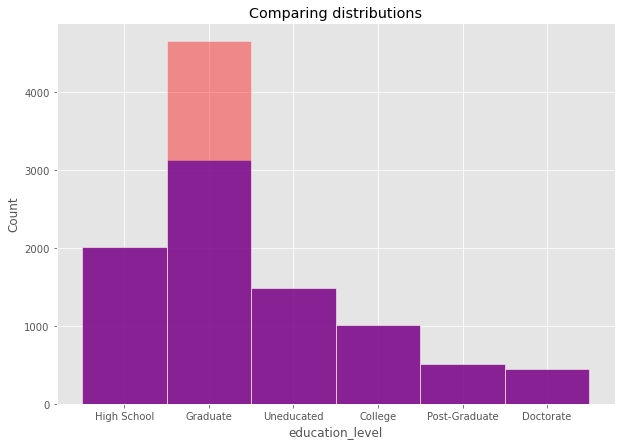

In [14]:
vz.nulls_substitution(categorical_df,'education_level','mode')

In [15]:
# reemplazamos en ambos df's
categorical_df['education_level'].fillna('Graduate',inplace=True)
df['education_level'].fillna('Graduate',inplace=True)

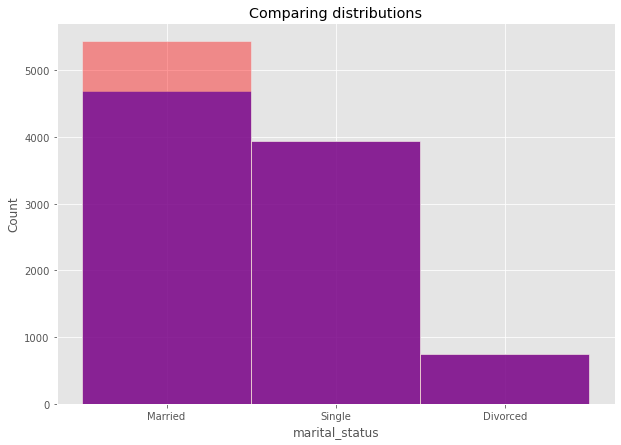

In [16]:
vz.nulls_substitution(categorical_df,'marital_status','mode')

In [17]:
# reemplazamos en ambos df's
categorical_df['marital_status'].fillna('Married',inplace=True)
df['marital_status'].fillna('Married',inplace=True)

Al reemplazar los nulos por la moda de cada una de nuestras variables no se vió afectada la distribución de ninguna.

In [18]:
new_top = fn.cat_proportion(df,categorical_df,'client_stayed')

,client_stayed
gender,
F,0.826428
M,0.853848


,client_stayed
education_level,
College,0.847976
Doctorate,0.789357
Graduate,0.840112
High School,0.847988
Post-Graduate,0.821705
Uneducated,0.840619


,client_stayed
marital_status,
Divorced,0.838235
Married,0.845843
Single,0.830586


,client_stayed
card_category,
Blue,0.839021
Gold,0.818966
Platinum,0.750000
Silver,0.852252


In [19]:
new_top

,client_stayed,diff
Platinum,0.750000,0.089340
Doctorate,0.789357,0.049983
Gold,0.818966,0.020375
Post-Graduate,0.821705,0.017635
M,0.853848,0.014507
F,0.826428,0.012913
Silver,0.852252,0.012912
Single,0.830586,0.008755
High School,0.847988,0.008648
College,0.847976,0.008636


Los cambios son demasiado pequeños.

### <font color='brown'>Variables numéricas


In [20]:
numeric_df = df.select_dtypes(exclude=['object']).copy()

Para las variables numéricas también observamos si existen valore nulos, y que tantos valores únicos tiene cada una.

In [21]:
fn.dqr(numeric_df)

,% of nulls,unique_values,type
clientnum,0.0000,10127,int64
client_stayed,0.0000,2,int64
customer_age,0.0000,45,int64
dependent_count,0.0000,6,int64
income_category,0.1098,5,float64
months_on_book,0.0000,44,int64
total_relationship_count,0.0000,6,int64
months_inactive_12_mon,0.0000,7,int64
contacts_count_12_mon,0.0000,7,int64
credit_limit,0.0000,6205,float64


* `income_category` es la única variable numérica que contiene nulos, exactamente un **10.98%** respecto a su total por lo que procederé ahora a sustituir estos nulos con el promedio y observaré si los estadísticos no se ven muy afectados, al igual que la distribución.

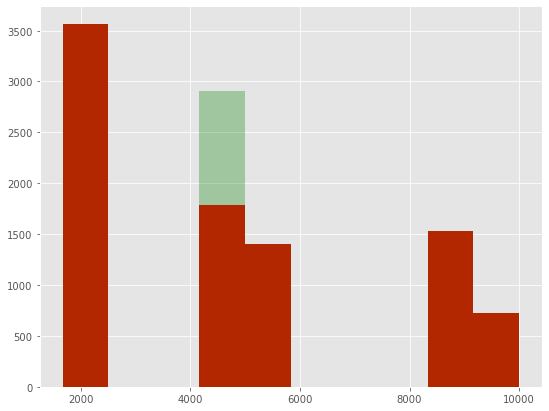

In [22]:
plt.figure(figsize=(9,7))
plt.hist(df.income_category, color = 'red');
plt.hist(df.income_category.fillna(df.income_category.mean()), color = 'green', alpha=.3);

In [23]:
print(f'Media antes: {df.income_category.mean()}, media después: {(df.income_category.fillna(df.income_category.mean())).mean()}')
print(f'Std antes: {df.income_category.std()}, std después: {(df.income_category.fillna(df.income_category.mean())).std()}')

Media antes: 4618.228877796463, media después: 4618.22887779636
Std antes: 2897.937721529465, std después: 2734.191087497883


La distribución no cambia, y los estadísticos tampoco sufren cambios radicales, por lo que se procederá a la sustitución de nulos por la media.

In [24]:
df.income_category = df.income_category.fillna(df.income_category.mean())
numeric_df.income_category = numeric_df.income_category.fillna(numeric_df.income_category.mean())

#Nota: los cambios se realizaron en ambos sets

De igual manera haré uso de una función que ya habíamos utilizado con anterioridad con el fin de observar estadísticos descriptivos para cada una de nuestras variables numéricas y entederlas mejor.


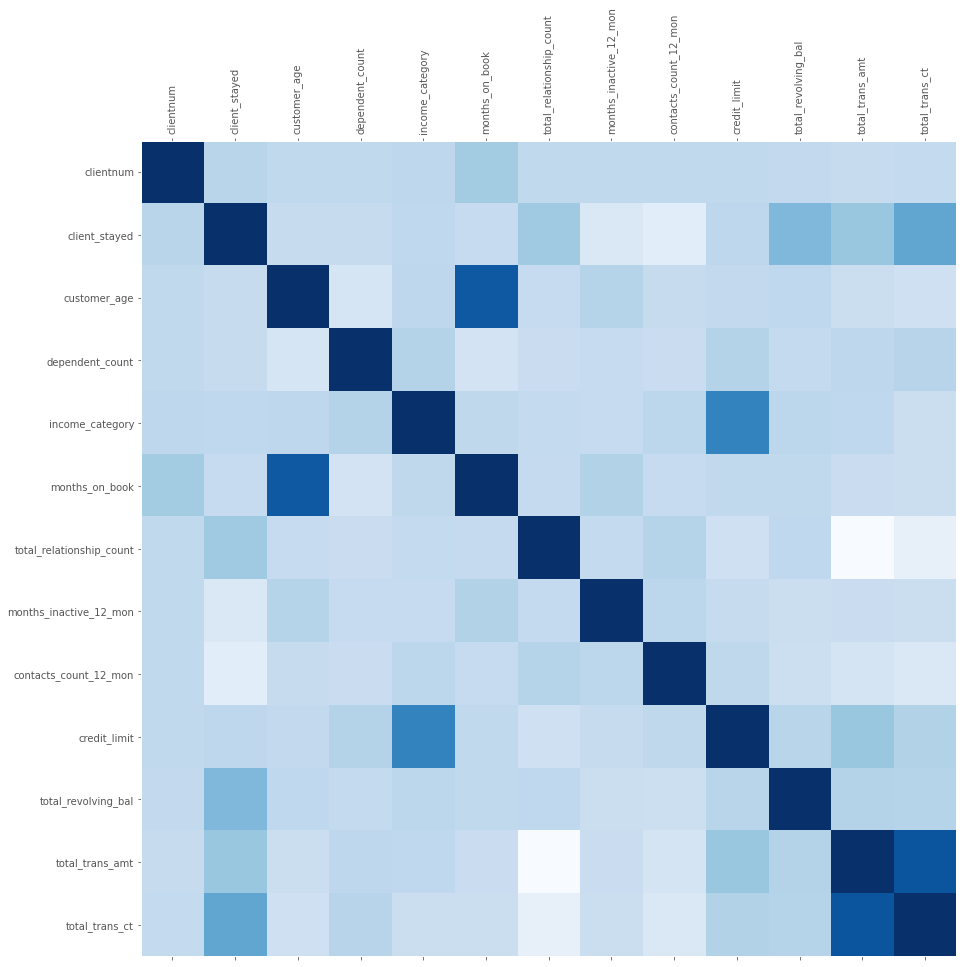

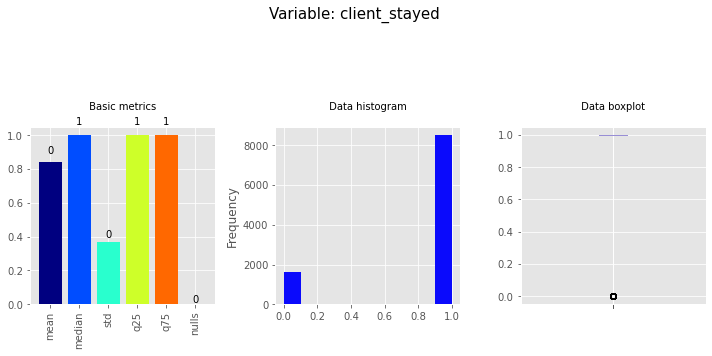

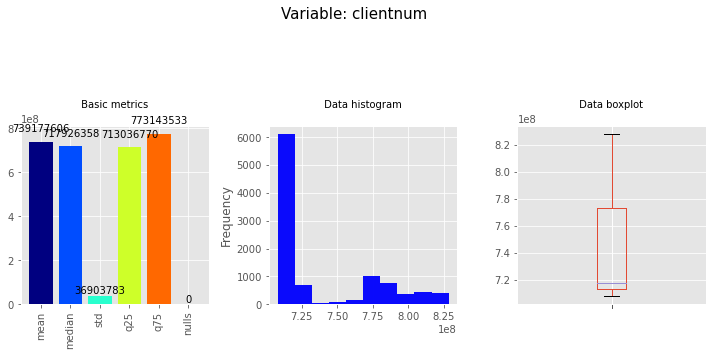

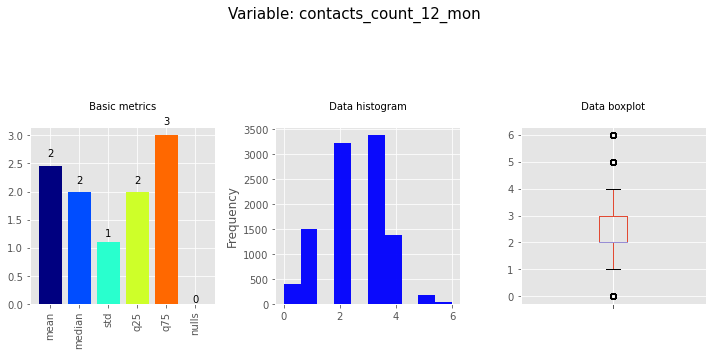

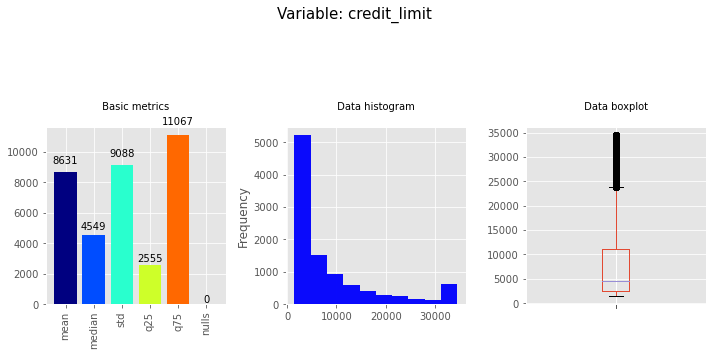

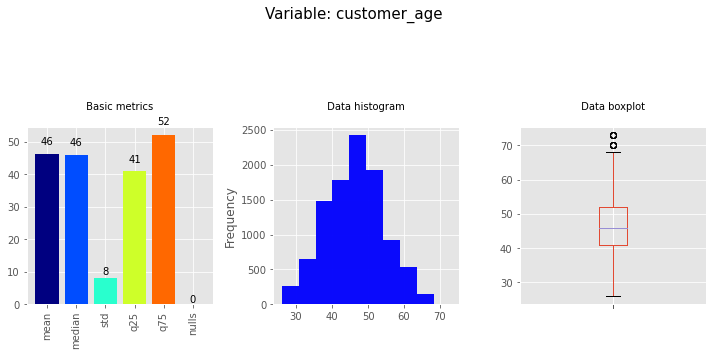

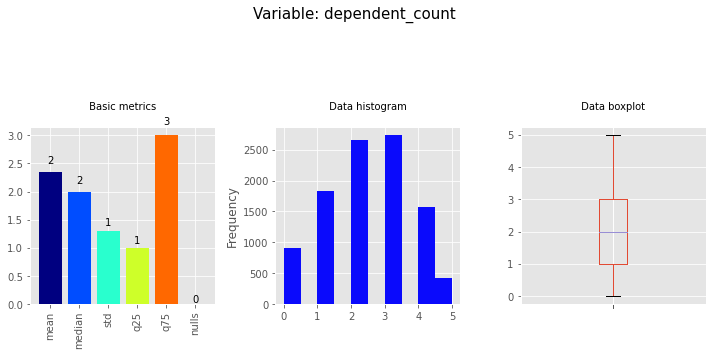

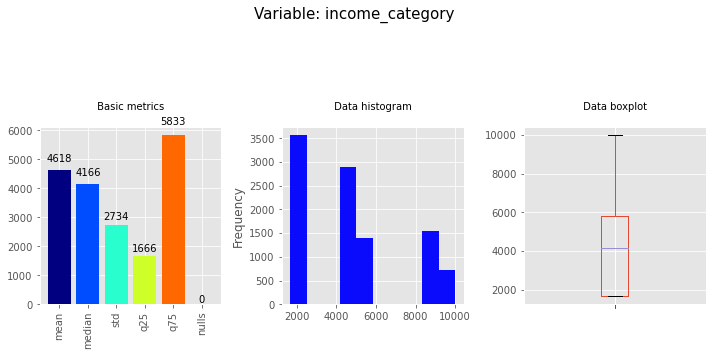

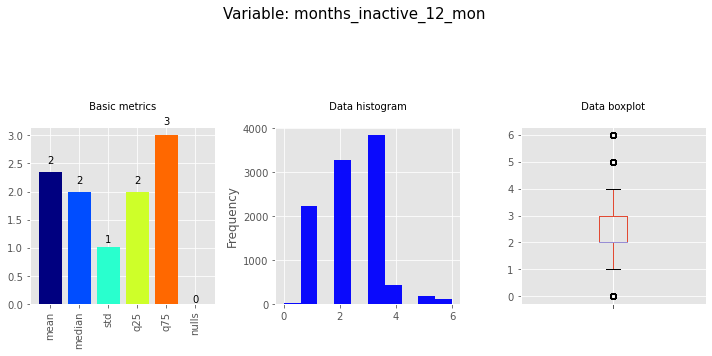

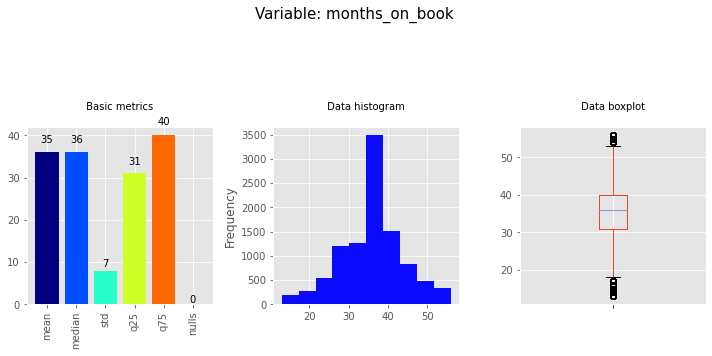

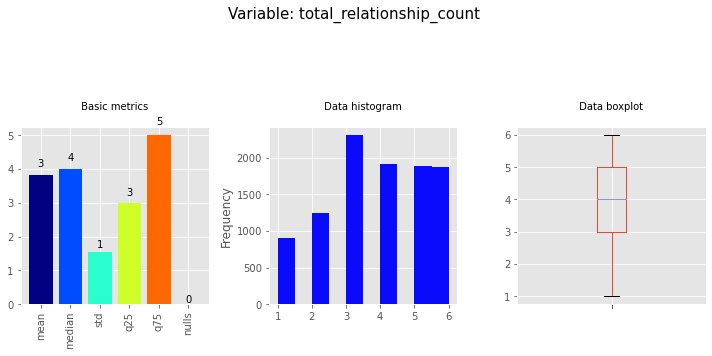

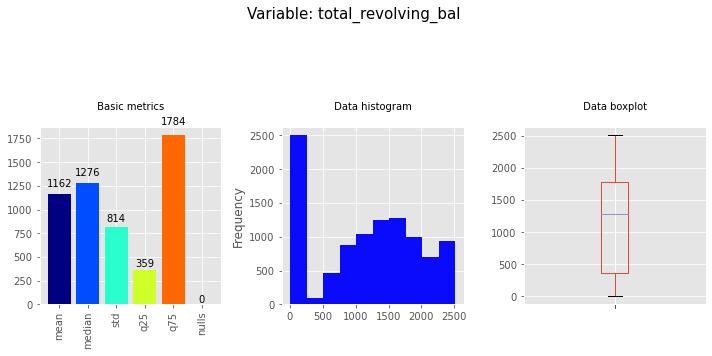

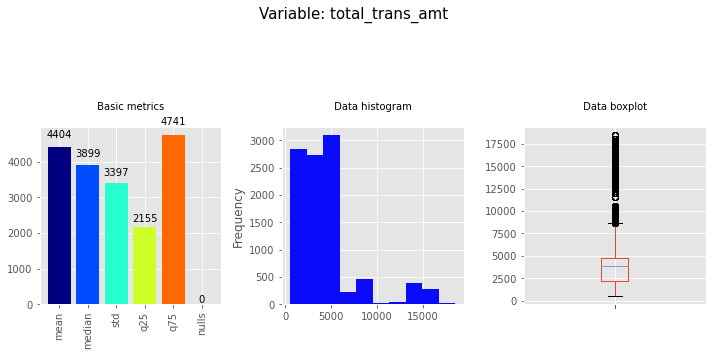

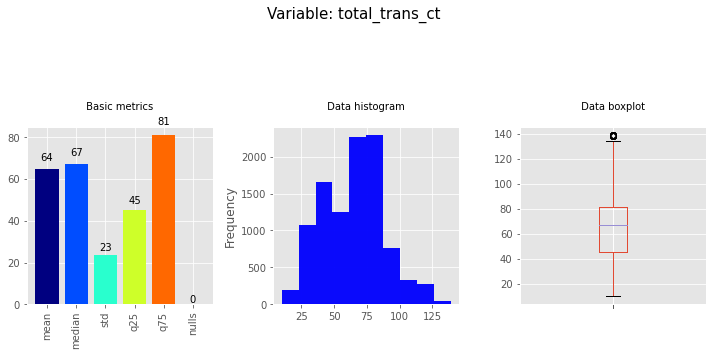

In [25]:
vz.plot_numeric(numeric_df,fn.get_numeric_stats(numeric_df))

Por último observaremos la correlación de cada uno de los predictores respecto a nuestra variable objetivo:

In [26]:
abs(numeric_df.corr()['client_stayed']).sort_values(ascending=False)

client_stayed               1.000000
total_trans_ct              0.371403
total_revolving_bal         0.263053
contacts_count_12_mon       0.204491
total_trans_amt             0.168598
months_inactive_12_mon      0.152449
total_relationship_count    0.150005
clientnum                   0.046430
credit_limit                0.023873
dependent_count             0.018991
customer_age                0.018203
months_on_book              0.013687
income_category             0.011991
Name: client_stayed, dtype: float64

### <font color='brown'>Observaciones iniciales:</font>
> 1. Como ya habíamos notado al análizar nuestras variables categóricas vemos nuevamente que nuestra variable objetivo está muy desbalanceada <br><br>
> 2. Omitiremos los estadísticos de `cient_num` ya que es un Id.<br><br>
> 3. Respecto a nuestra variable `contacts_count_12_mon` la media y mediana son iguales a **2**, esto quiere decir que la mayoría de nuestros clientes se contactaron muy pocas veces con el banco en los últimos meses, en el boxplot vemos que toma como valores atípicos el **5** y el **6**, los clientes que cuenten con estos valores podrían ser interesantes ya que surge la duda de si se contactan más veces que el promedio de clientes debido a que solicitan un mayor número de servicios del banco o por otro lado si son llamadas negativas. <br><br>
> 4. En la variable de `credit_limit` vemos que el **50%** de las personas tienen un límite de crédito inferior a 4549, ademas que lo normal es que mientras aumenta el límite de crédito la cantidad de personas que poseen esto va disminuyendo, es interesante también el observar que existe un grupo reducido de personas que cuentan con un límite de crédito superior a 25,000 los cuales ya son considerados outliers, podemos pensar que esta variable es un espejo de la situación económica de las personas ya que el límite de crédito va ligado a la capacidad de pago y de este último un factor importante es el nivel de ingresos.<br><br>
> 5. La mayoría de las personas de nuestro data set tienen entre **41** y **52** años, además vemos que se está considerando como outliers a las personas mayores a 70 años, estos outliers no serán removidos ya que considero que es coherente que personas de esa edad sigan con servicios bancarios activos.<br><br>
> 6. La mayoría de las personas cuentan con pocos dependientes económicos, el 75% cuenta con 3 o menos dependientes<br><br>
> 7. Observamos también que en el momento en el que se obtuvieron los datos la mayoría de las personas no habían dejado pasar mucho tiempo sin utilizar su instrumento de crédito, el 75% habían dejado pasar 3 meses o menos sin utilizarlo, en este momento podemos pensar que sería logico que aquellos que son considerados outliers (5-6 meses sin utilizarlo) sean más propensos a dejar de ser clientes. <br><br>
> 8. Otro insight que podemos rescatar es que la mayoría de nuestros clientes han estado activos desde la apertura de su instrumento entre 30-40 meses<br><br>
> 9. el 75% de nuestros clientes cuentan con 3 o más productos<br><br>
> 10. La mayoría de las personas ha transaccionado menos de 4741, pero podemos ver que hay un grupo que ha transaccionado más de 8,000 (este grupo ya se considera outliers en el gráfico) y probablemente este grupo es el mismo que cuentan con un límite de crédito superior al del promedio (el cual también es outlier en el de `credit_limit`).
> Las variables que tienen una mayor correlación con nuestra variable objetivo son las siguientes:<br><br>

* `total_trans_ct `<br>
*`total_revolving_bal`<br>
*`contacts_count_12_mon `<br>
*`total_trans_amt `<br>
*`months_inactive_12_mon` <br>
*`total_relationship_count`<br><br>
Por lo que es probable que sean buenas predictoras.

### <font color='brown'>Análisis cruzado</font>

In [27]:
for c in categorical_df.columns:
    display(df.groupby(c).agg({
        'credit_limit':['mean','median'],
        'contacts_count_12_mon':['mean','median'],
        'months_inactive_12_mon':['mean','median'],
        'total_trans_amt':['mean','median']
}))
    print('')

credit_limit         contacts_count_12_mon         \
                mean  median                  mean median   
gender                                                      
F        5023.854274  3048.0              2.413587    2.0   
M       12685.674963  8902.0              2.502202    3.0   

       months_inactive_12_mon        total_trans_amt          
                         mean median            mean  median  
gender                                                        
F                    2.351810    2.0     4324.318216  4134.0  
M                    2.329209    2.0     4493.706228  3513.0

credit_limit         contacts_count_12_mon         \
                        mean  median                  mean median   
education_level                                                     
College          8684.536130  4489.0              2.425469    2.0   
Doctorate        8413.258980  4480.0              2.450111    2.0   
Graduate         8541.813277  4562.0              2.459006    2.0   
High School      8605.823547  4546.0              2.446597    2.0   
Post-Graduate    8862.560465  4473.0              2.422481    2.0   
Uneducated       8899.509011  4654.0              2.488904    3.0   

                months_inactive_12_mon        total_trans_amt          
                                  mean median            mean  median  
education_level                                                        
College                       2.353406    2.0     4255.806515  3934.0  
Doctorate                     2.352550    2.0     4193.015521  3696.0  
Graduate                      2.337422    2.0     4419.001937  3890.0  
High School                   2.329856    2.0     4403.740189  3904.0  
Post-Graduate                 2.313953    2.0     4515.414729  4013.0  
Uneducated                    2.365837    2.0     4484.340955  3928.0

credit_limit         contacts_count_12_mon         \
                       mean  median                  mean median   
marital_status                                                     
Divorced        9358.565107  5119.5              2.422460    2.0   
Married         8265.237564  4378.5              2.451803    2.0   
Single          8999.684758  4712.0              2.466396    2.0   

               months_inactive_12_mon        total_trans_amt          
                                 mean median            mean  median  
marital_status                                                        
Divorced                     2.347594    2.0     4529.090909  3883.0  
Married                      2.332046    2.0     4248.729581  3756.0  
Single                       2.352523    2.0     4594.554400  4039.0

credit_limit          contacts_count_12_mon         \
                       mean   median                  mean median   
card_category                                                       
Blue            7363.780002   4105.0              2.455596    2.0   
Gold           28416.370690  34516.0              2.448276    2.0   
Platinum       30283.450000  34516.0              2.500000    3.0   
Silver         25277.836036  29808.0              2.450450    2.0   

              months_inactive_12_mon        total_trans_amt          
                                mean median            mean  median  
card_category                                                        
Blue                        2.345697    2.0     4225.406740  3856.5  
Gold                        2.310345    2.0     7685.612069  7652.5  
Platinum                    2.250000    2.0     8999.750000  8427.0  
Silver                      2.273874    2.0     6590.482883  4303.0

Para este análisis únicamente utilizamos las variables categóricas junto con las variables que cuentan con mayor correlación con nuestra variable objetivo.

* Las mujeres en promedio tienen mucho menos límite de crédito que los hombres, incluso vemos que la mediana está muy por debajo del promedio, por lo que es probable que un grupo reducido de mujeres sean las que elevan ese promedio pero es interesante observar que el 50% de las mujeres tienen un límite de crédito inferior a 3048. <br>

* El nivel de educación no es un factor importante en el ímite de crédito. <br> Y volvemos a observar el patrón de que la mediana es muy inferior al promedio por lo que no es propio de la variable de género esto se refleja en la mayoría de las categorías .
* Los clientes con tarjeta azul han transaccionado en promedio menos dinero que los de otros colores (podemos pensar que este color de tarjeta es para los que van iniciado o los que tienen menores ingresos).

**Analizando las proporciones de la variable de respuesta pero ahora en nuestras variables numéricas**

Se ajustó el número de intervalos en la variable dependent_count debido a que existieron duplicados
Se ajustó el número de intervalos en la variable income_category debido a que existieron duplicados
Se ajustó el número de intervalos en la variable total_relationship_count debido a que existieron duplicados
Se ajustó el número de intervalos en la variable months_inactive_12_mon debido a que existieron duplicados
Se ajustó el número de intervalos en la variable contacts_count_12_mon debido a que existieron duplicados
Se ajustó el número de intervalos en la variable total_revolving_bal debido a que existieron duplicados


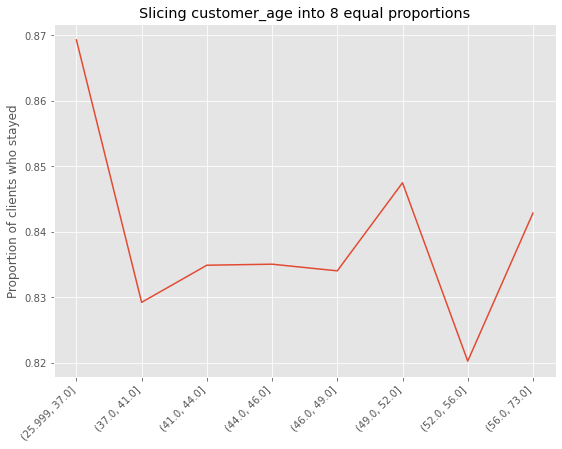

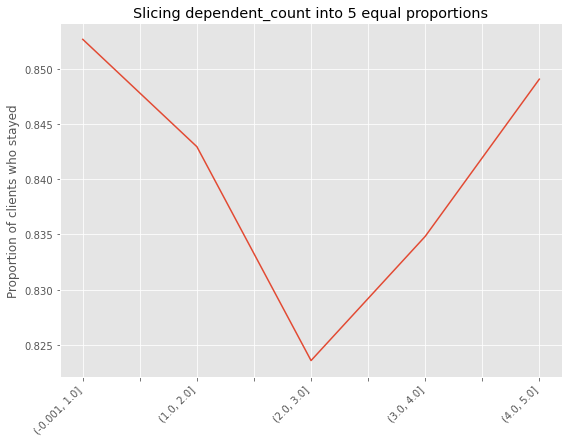

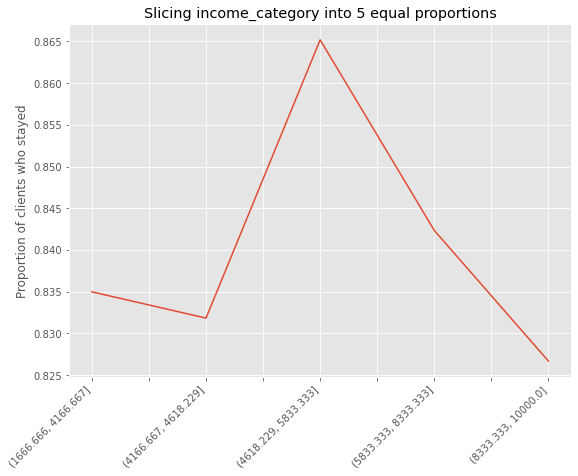

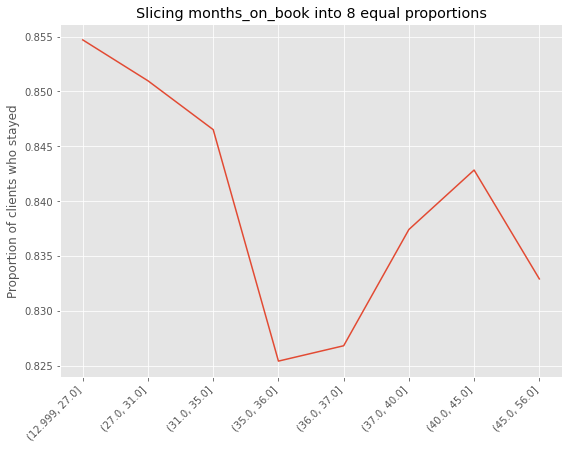

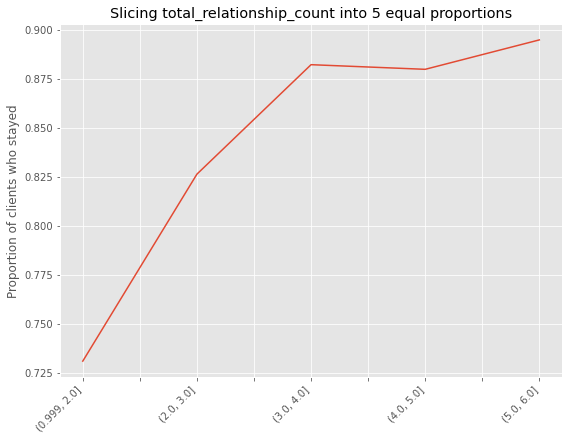

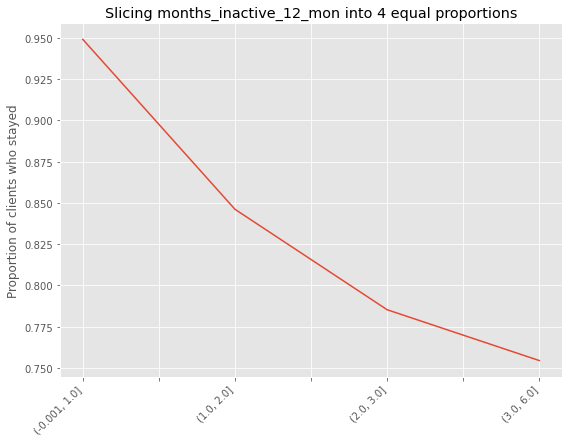

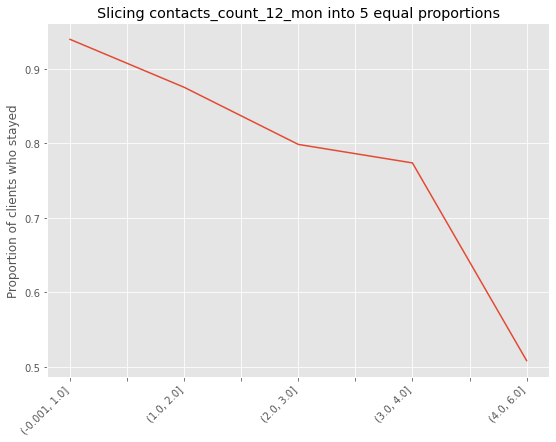

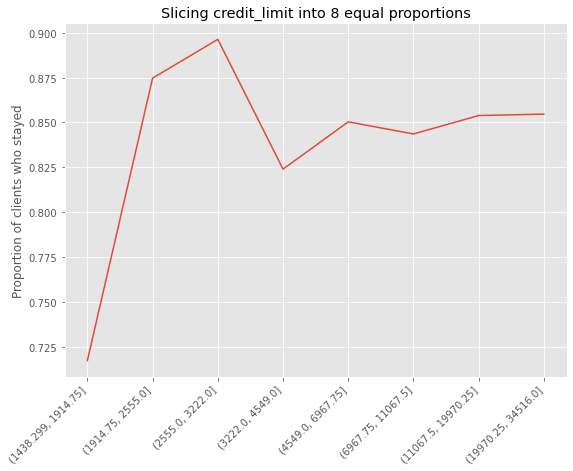

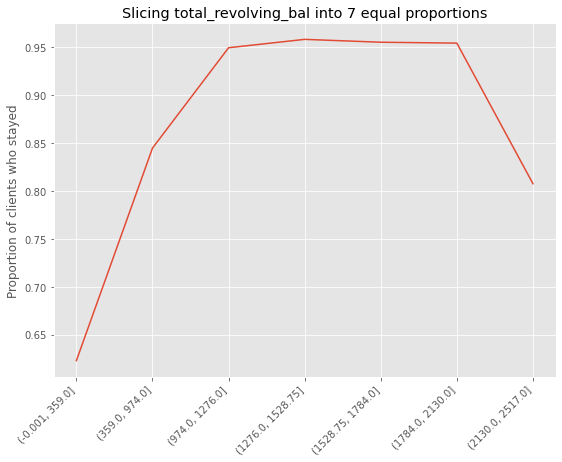

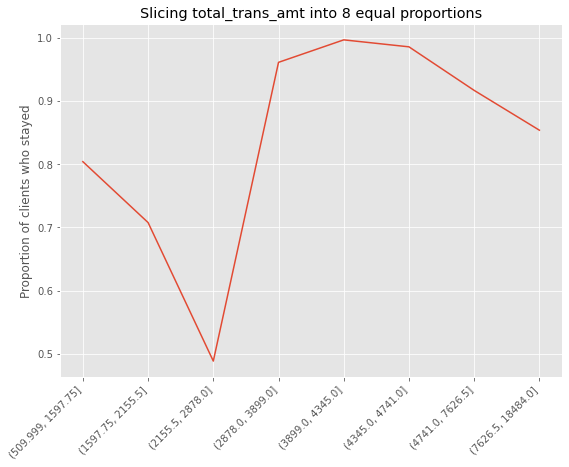

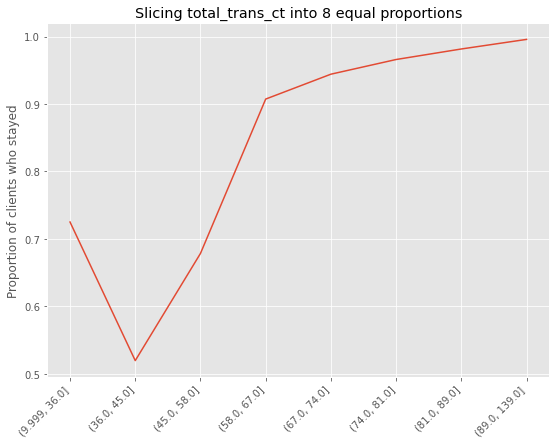

In [28]:
# Eliminamos de nuestra lista de predictores a nuestra columna de Id's y también a nuestra varaible de respuesta.
predictors = numeric_df.drop(columns=['client_stayed','clientnum']).columns
for predictor in predictors:
        vz.prop_by_quint(df,predictor,'client_stayed',8)

Después de observar la proporción de clientes que se quedaron en el banco en cada de nuestras variables numéricas seccionando por quintiles vemos que solo unas cuantas son las que parecen tener relación con esta proporción, como lo son:
* `contacts_count_12_mon` mientras aumentan los valores de esta variable, disminuye la proporción de clientes que se quedan lo que ahora nos hace pensar que lo más probable es que son llamadas telefónicas negativas, quizá quejas o reclamos.<br><br>
* `months inactive_12_mon` en esta variable también tenemos una relación inversa, si el número de meses inactivos aumenta la probabilidad de continuar siendo clientes disminuye. <br>
    - ¿Si no utilizan el instrumento, para qué lo quieren? <br>
    - Podría ser una buena opción incentivar a estos clientes con  promociones o algo por el estilo.<br><br>
* `total_relationship_count` Mientras más instrumentos/productos tiene el cliente más probable es que se quede, señal que tiene una buena relación con el banco y se siente cómodo siendo cliente del mismo. <br><br>
* `total_trans_ct` En esta variable también se puede ver una relación directa, si los valores en esta variable aumentan, la proporción de clientes que se quedan también.

In [29]:
numeric_df.describe().loc[['min','max'],'customer_age':]

,customer_age,dependent_count,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
min,26.0,0.0,1666.666667,13.0,1.0,0.0,0.0,1438.3,0.0,510.0,10.0
max,73.0,5.0,10000.000000,56.0,6.0,6.0,6.0,34516.0,2517.0,18484.0,139.0


Solo restaría detectar outliers que para eso ya vimos distintos métodos, sin embargo no lo haré debido a que ya revisé los estadísticos de cada una de ellas así como los boxplot y a pesar de que si parecen existir (por la diferencia en media y mediana y el boxplot en algunas variables) la verdad es que después de realizar el análisis de mis datos y entenderlos llego a la conclusión de que realmente **tiene sentido que estos valores existan** y al eliminarlos podríamos estar eliminando información valiosa.

<hr style="border:0.02in solid gray"> </hr>

<font color= brown> <font size = 5> 2. Feature engineering </font>

Imprimiré las columnas nuevamente solo para consultarlas de manera más rápida.

In [30]:
categorical_df.columns.tolist()

['gender', 'education_level', 'marital_status', 'card_category']

In [31]:
numeric_df.columns.tolist()

['clientnum',
 'client_stayed',
 'customer_age',
 'dependent_count',
 'income_category',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'credit_limit',
 'total_revolving_bal',
 'total_trans_amt',
 'total_trans_ct']

In [32]:
fn.dqr(numeric_df)

,% of nulls,unique_values,type
clientnum,0.0,10127,int64
client_stayed,0.0,2,int64
customer_age,0.0,45,int64
dependent_count,0.0,6,int64
income_category,0.0,6,float64
months_on_book,0.0,44,int64
total_relationship_count,0.0,6,int64
months_inactive_12_mon,0.0,7,int64
contacts_count_12_mon,0.0,7,int64
credit_limit,0.0,6205,float64


### <font color='green'> Nuevas variables:
    
* **trans_ct_by_card**: variable binaria en la cual toma el valor de **1** si es que el cliente realizo la misma cantidad de transacciones o más que el promedio de las personas que poseen su mismo tipo de tarjeta, de lo contrario toma el valor de **0**.<br><br>
* **trans_amt_by_card**: variable binaria en la cual toma el valor de **1** si es que el cliente transaccionó la misma cantidad de dinero o más que el promedio de las personas que poseen su mismo tipo de tarjeta, de lo contrario toma el valor de **0**.<br><br>
* **proportion_of_debt**: Este es el porcentaje de dinero que debe el cliente en relación a su límite de crédito.<br><br>
* **proportion_of_debt_by_card**: variable binaria en la cual toma el valor de **1** si es que el cliente debe en terminos relativos lo mismo o más respecto a su límite de credito que el promedio de las personas que poseen su mismo tipo de tarjeta, de lo contrario toma el valor de **0**<br><br>
* **trans_amt_by_cl**: Cuánto dinero ha transaccionado en relación a su límite de crédito.<br><br>

    
**Nota:** Como al inicio de nuestro análisis se pudo observar que la variable de `card_category` era de las variables categóricas que probablemente podría influir más en nuestra variable de respuesta es por eso que se tomó la decisión de crear nuevas variables a partir de esta y de numéricas cuidando que su relación tuvieran sentido.

In [33]:
# Creación:

df['trans_ct_by_card'] = fn.magic(df,'card_category','total_trans_ct')

df['trans_amt_by_card'] = fn.magic(df,'card_category','total_trans_amt')

df['proportion_of_debt'] = df.total_revolving_bal/df.credit_limit
df['proportion_of_debt_by_card']  = fn.magic(df,'card_category','proportion_of_debt',metric='median')

df['trans_amt_by_cl'] = df.total_trans_amt / df.credit_limit


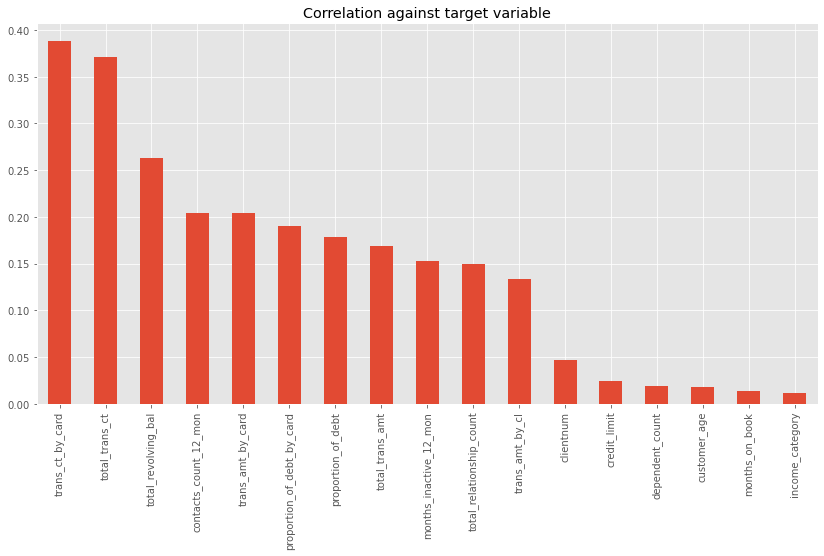

In [34]:
corr = df.corr()['client_stayed']
plt.figure(figsize=(14,7))
np.abs(corr).sort_values(ascending=False).iloc[1:].plot.bar()
plt.title('Correlation against target variable');

<hr style="border:0.02in solid gray"> </hr>

<font color= brown> <font size = 5> 3. Selección de variables </font>

<font color= 'k'> <font size = 4> 2.1 Threshold por correlación </font>

Elegí este método y no el varianza debido a que tenemos varias variables de baja granularidad y algunas otras binarias por lo que el nivel de variabilidad es bastante bajo, además que una de las métricas que estuve observando bastante a la hora de realizar feature engineering fue la correlación por lo que este método sería el más conveniente.

* Realizar un train/test split 

In [35]:
predictors = [c for c in df.columns if c!='client_stayed' if c!='clientnum']
seed=17
train_x,test_x,train_y,test_y = train_test_split(df[predictors],
                                                df['client_stayed'],
                                                test_size=.2,
                                                random_state=seed)

* Obtener métricas para la normalización de nuestros datos (solo de nuestro set de entrenamiento).

In [36]:
# Sacando numéricos
numeric_cols = df[predictors].select_dtypes(exclude=['object','category']).columns

In [37]:
# Obteniendo medias y desviaciones estándar
means = train_x[numeric_cols].mean()
stds = train_x[numeric_cols].std()

* Normalizar las variables tanto en el set de entrenamiento como en el de test

In [38]:
# Normalizando set de entrenamiento
train_x[numeric_cols] = (train_x[numeric_cols] - means) / stds

In [39]:
# Normalizando set de prueba
test_x[numeric_cols] = (test_x[numeric_cols] - means) / stds

#### Análisis de correlación

Para realizar este método se generó una clase utilizando código realizado en clase en el cuál la lógica es bastante sencilla:
> Obtener la correlación de nuestros predictores <br><br>
> Generar un vector conformado por nuestras correlaciones, haciendo cortes cada cierto intervalo, el cual está definido por el máximo de este vector menos el mínimo y el resultado dividido entre el numero de predictores <br><br>
> Seleccionaremos variables que cumplan con cierto nivel de correlación (nuestro threshold) el cual estará iterando por el vector generado previamente.<br><br>
> Para cada grupo de variables seleccionadas, generar una regresión logística y obtener el AUC<br><br>
> gráficar y observar resultados

In [66]:
values = pd.concat([train_x[numeric_cols],train_y],axis=1).corr()['client_stayed'][0:-1]
values

customer_age                 -0.011765
dependent_count              -0.029544
income_category               0.010194
months_on_book               -0.003558
total_relationship_count      0.142206
months_inactive_12_mon       -0.152028
contacts_count_12_mon        -0.208387
credit_limit                  0.018641
total_revolving_bal           0.278688
total_trans_amt               0.162526
total_trans_ct                0.366915
trans_ct_by_card              0.383471
trans_amt_by_card             0.198480
proportion_of_debt            0.189157
proportion_of_debt_by_card    0.201671
trans_amt_by_cl               0.131260
Name: client_stayed, dtype: float64

In [67]:
correlation_analisis = fn.V_selection(pd.concat([train_x[numeric_cols],train_y],axis=1),pd.concat([test_x[numeric_cols],test_y],axis=1),values.abs(),'client_stayed')

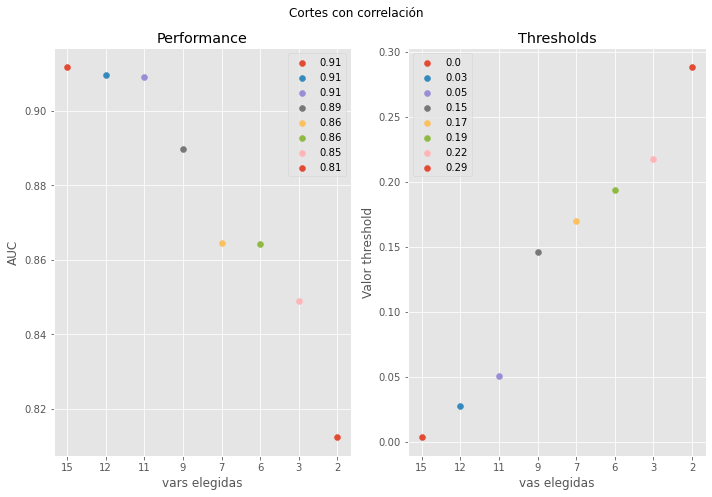

In [68]:
correlation_analisis.visualize_selections(method='correlación')

In [69]:
evaluaciones = correlation_analisis.generate_models()

In [71]:
evaluaciones[6]

{'threshold': 0.21725899566381807,
 'variables': ['total_revolving_bal', 'total_trans_ct', 'trans_ct_by_card'],
 'performance': 0.8489289698424156}

In [73]:
df.corr()['total_trans_ct'].loc[['trans_ct_by_card','total_revolving_bal']]

trans_ct_by_card       0.81313
total_revolving_bal    0.05606
Name: total_trans_ct, dtype: float64

* Utilizando únicamente 3 variables obtenemos un AUC del 85%
* Una de las variables seleccionadas es una generada en nuestro proceso de feature engineering y de hecho es una versión mejorada de la variable que inicialmente tenía la mayor correlación con nuestra variable de respuesta y es una seleccionada debido a que ahora esa variable es la que tiene una mayor correlación con nuestra variable objetivo.

# <font color= #6B6B6B> <font size = 6>Conclusiones</font>

<hr style="border:0.02in solid gray"> </hr>

* Es fundamental el proceso de realizar un análisis de nuestras variables antes de realizar feature engineering, ya que si no conocemos bien las variables que estamos manejando no sabremos como sacar más valor.
* Antes de pensar en realizar un modelo se debe de pensar en sacarle todo el jugo a nuestro set de datos.
* Lo primero que se debe de hacer a la hora de querer resolver un problema con machine learning es conocer los datos lo mayor posible.
* El hecho de utilizar más de un método para cualquier procedimiento enriqueserá los resultados (detección de outliers, selección de variables, etc...)
* Hizo falta profundizar aún más, sin embargo por cuestión de tiempos únicamente se trabajó con los métodos empleados pero es necesario mencionar que aunque era un set de datos pequeño y realmente no se necesitó un pre procesamiento extenso se le podrían realizar más procesos (más análisis, más feature engineering, combinar métodos de selección de variables, realizar otro tipo de transformaciones a las variables, encodear las variables categóricas entre otras cosas).

# <font color= #6B6B6B> <font size = 6> Bibliografía </font>

<hr style="border:0.02in solid gray"> </hr>

Unicamente se consultó código proporcionado en clases.

<br>